In [1]:
# read in csv file from DBFS (Databricks file store) and store as a Spark dataframe

reviews_spark = sqlContext.read.format('csv').options(header='true', inferSchema='false', delimiter='\t').load('/FileStore/tables/labeledTrainData.tsv')

display(reviews_spark)

id,sentiment,review
5814_8,1,"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 minutes or so excluding the Smooth Criminal sequence and Joe Pesci is convincing as a psychopathic all powerful drug lord. Why he wants MJ dead so bad is beyond me. Because MJ overheard his plans? Nah, Joe Pesci's character ranted that he wanted people to know it is he who is supplying drugs etc so i dunno, maybe he just hates MJ's music.Lots of cool things in this like MJ turning into a car and a robot and the whole Speed Demon sequence. Also, the director must have had the patience of a saint when it came to filming the kiddy Bad sequence as usually directors hate working with one kid let alone a whole bunch of them performing a complex dance scene.Bottom line, this movie is for people who like MJ on one level or another (which i think is most people). If not, then stay away. It does try and give off a wholesome message and ironically MJ's bestest buddy in this movie is a girl! Michael Jackson is truly one of the most talented people ever to grace this planet but is he guilty? Well, with all the attention i've gave this subject....hmmm well i don't know because people can be different behind closed doors, i know this for a fact. He is either an extremely nice but stupid guy or one of the most sickest liars. I hope he is not the latter."
2381_9,1,"""The Classic War of the Worlds"" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur ""critics"" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the ""critics"". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells' classic novel, and we found it to be very entertaining. This made it easy to overlook what the ""critics"" perceive to be its shortcomings."
7759_3,0,"The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like ¨Jurassik Park¨, and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwhile some youngsters enter in the restricted area of the security center and are attacked by a pack of large pre-historical animals which are deadlier and bigger . In addition , a security agent (Stacy Haiduk) and her mate (Brian Wimmer) fight hardly 

In [2]:
# convert reviews to pandas dataframe

import pandas as pd

reviews = reviews_spark.toPandas()

display(reviews.head(2))

id,sentiment,review
5814_8,1,"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 minutes or so excluding the Smooth Criminal sequence and Joe Pesci is convincing as a psychopathic all powerful drug lord. Why he wants MJ dead so bad is beyond me. Because MJ overheard his plans? Nah, Joe Pesci's character ranted that he wanted people to know it is he who is supplying drugs etc so i dunno, maybe he just hates MJ's music.Lots of cool things in this like MJ turning into a car and a robot and the whole Speed Demon sequence. Also, the director must have had the patience of a saint when it came to filming the kiddy Bad sequence as usually directors hate working with one kid let alone a whole bunch of them performing a complex dance scene.Bottom line, this movie is for people who like MJ on one level or another (which i think is most people). If not, then stay away. It does try and give off a wholesome message and ironically MJ's bestest buddy in this movie is a girl! Michael Jackson is truly one of the most talented people ever to grace this planet but is he guilty? Well, with all the attention i've gave this subject....hmmm well i don't know because people can be different behind closed doors, i know this for a fact. He is either an extremely nice but stupid guy or one of the most sickest liars. I hope he is not the latter."
2381_9,1,"""The Classic War of the Worlds"" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur ""critics"" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the ""critics"". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells' classic novel, and we found it to be very entertaining. This made it easy to overlook what the ""critics"" perceive to be its shortcomings."


In [3]:
import numpy as np 
from bs4 import BeautifulSoup 
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Unzipping corpora/stopwords.zip.
 Out[ 3 ]: True

In [4]:
def review_to_words(raw_review):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review,"lxml").get_text() 
    
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
     
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

clean_review = review_to_words( reviews["review"][0] )
print(clean_review) #test shows that function works

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working one kid let alone whole bunch performing complex dance scene bottom line movie people like mj one level another think people stay away try give wholesome message ironically mj bestest buddy movie girl michael jackson truly one talented people ever grace planet guilty well attention gave subject hmmm well know people different behind closed doors know fact either extremely nice stupid guy one sickest liars hope latter

In [5]:
#now loop over all reviews to clean

# Get the number of reviews based on the dataframe column size
num_reviews = reviews["review"].size
print(reviews["review"].size,'\n')

# Initialize an empty list to hold the clean reviews
clean_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range( 0, num_reviews ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%5000 == 0 ):
        print("Completed review %d of %d\n" % ( i+1, num_reviews ))
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_reviews.append(review_to_words(reviews["review"][i]))



25000 

Completed review 5000 of 25000

Completed review 10000 of 25000

Completed review 15000 of 25000

Completed review 20000 of 25000

Completed review 25000 of 25000

In [6]:
clean_reviews[0]

Out[ 6 ]: 'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working one kid let alone whole bunch performing complex dance scene bottom line movie people like mj one level another think people stay away try give wholesome message ironically mj bestest buddy movie girl michael jackson truly one talented people ever grace planet guilty well attention gave subject hmmm well know people different behind closed doors know fact either extremely nice stupid guy one sickest liars hope latter'

In [7]:
clean_reviews_df = reviews[['id','sentiment']]
clean_reviews_df['review'] = clean_reviews

display(clean_reviews_df)

id,sentiment,review
5814_8,1,stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working one kid let alone whole bunch performing complex dance scene bottom line movie people like mj one level another think people stay away try give wholesome message ironically mj bestest buddy movie girl michael jackson truly one talented people ever grace planet guilty well attention gave subject hmmm well know people different behind closed doors know fact either extremely nice stupid guy one sickest liars hope latter
2381_9,1,classic war worlds timothy hines entertaining film obviously goes great effort lengths faithfully recreate h g wells classic book mr hines succeeds watched film appreciated fact standard predictable hollywood fare comes every year e g spielberg version tom cruise slightest resemblance book obviously everyone looks different things movie envision amateur critics look criticize everything others rate movie important bases like entertained people never agree critics enjoyed effort mr hines put faithful h g wells classic novel found entertaining made easy overlook critics perceive shortcomings
7759_3,0,film starts manager nicholas bell giving welcome investors robert carradine primal park secret project mutating primal animal using fossilized dna like jurassik park scientists resurrect one nature fearsome predators sabretooth tiger smilodon scientific ambition turns deadly however high voltage fence opened creature escape begins savagely stalking prey human visitors tourists scientific meanwhile youngsters enter restricted area security center attacked pack large pre historical animals deadlier bigger addition security agent stacy haiduk mate brian wimmer fight hardly carnivorous smilodons sabretooths course real star stars astounding terrifyingly though convincing giant animals savagely stalking prey group run afoul fight one nature fearsome predators furthermore third sabretooth dangerous slow stalks victims movie delivers goods lots blood gore beheading hair raising chills full scares sabretooths appear mediocre special effects story provides exciting stirring entertainment results quite boring giant animals majority made computer generator seem totally lousy middling performances though players reacting appropriately becoming food actors give vigorously physical performances dodging beasts running bound leaps dangling walls packs ridiculous final deadly scene small kids realistic gory violent attack scenes films sabretooths smilodon following sabretooth james r hickox vanessa angel david keith john rhys davies much better bc roland emmerich steven strait cliff curtis camilla belle motion picture filled bloody moments badly directed george miller originality takes many elements previous films miller australian director usually working television tidal wave journey center earth many others occasionally cinema man snowy river zeus roxanne robinson crusoe rating average bottom barrel
3630_4,0,must assumed praised film greatest filmed opera ever read somewhere either care opera care wagner care anyth

In [8]:
from nltk.probability import FreqDist
from nltk import word_tokenize
nltk.download('punkt')

string = 'this is is a sentence sentence sentence'
tokens = word_tokenize(string)
frequency = FreqDist(tokens)
print(frequency)
frequency.most_common(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] Unzipping tokenizers/punkt.zip.
<FreqDist with 4 samples and 7 outcomes>
 Out[ 8 ]: [('sentence', 3), ('is', 2), ('a', 1), ('this', 1)]

In [9]:
# most common words in one review

testfreq = word_tokenize(clean_reviews[0])
fdist1 = FreqDist(testfreq)
print(fdist1)
fdist1.most_common(20)

<FreqDist with 166 samples and 219 outcomes>
 Out[ 9 ]: 
[('mj', 11),
 ('people', 5),
 ('one', 4),
 ('know', 3),
 ('bad', 3),
 ('sequence', 3),
 ('maybe', 3),
 ('going', 3),
 ('movie', 3),
 ('like', 3),
 ('feature', 2),
 ('also', 2),
 ('jackson', 2),
 ('cool', 2),
 ('moonwalker', 2),
 ('watched', 2),
 ('guilty', 2),
 ('really', 2),
 ('joe', 2),
 ('whole', 2)]

In [10]:
from collections import Counter

# most common words in all reviews using Counter
Counter(" ".join(clean_reviews_df['review']).split()).most_common(10)

Out[ 10 ]: 
[('movie', 44031),
 ('film', 40147),
 ('one', 26788),
 ('like', 20274),
 ('good', 15140),
 ('time', 12724),
 ('even', 12646),
 ('would', 12436),
 ('story', 11983),
 ('really', 11736)]

In [11]:
# most common words in all reviews using FreqDist
fdist1 = FreqDist(" ".join(clean_reviews_df['review']).split())
print(fdist1)
fdist1.most_common(10)

<FreqDist with 74065 samples and 2988089 outcomes>
 Out[ 11 ]: 
[('movie', 44031),
 ('film', 40147),
 ('one', 26788),
 ('like', 20274),
 ('good', 15140),
 ('time', 12724),
 ('even', 12646),
 ('would', 12436),
 ('story', 11983),
 ('really', 11736)]

In [12]:
freq_all = pd.DataFrame(fdist1.most_common(15),
                  columns=['word', 'frequency'])
print(freq_all)

word frequency
0 movie 44031
1 film 40147
2 one 26788
3 like 20274
4 good 15140
5 time 12724
6 even 12646
7 would 12436
8 story 11983
9 really 11736
10 see 11475
11 well 10662
12 much 9765
13 get 9310
14 bad 9301

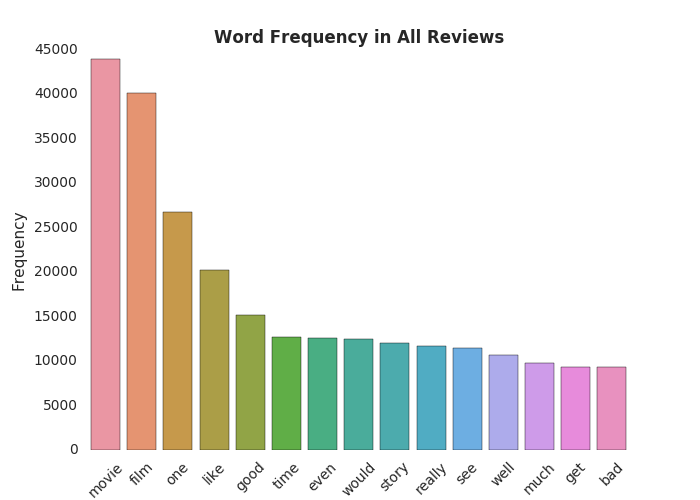

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(7,5))
sns.set(style="whitegrid")
ax = sns.barplot(x="word", y="frequency", data=freq_all)
plt.xticks(rotation=45)
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
plt.title('Word Frequency in All Reviews', fontweight='bold')
display(fig)

In [14]:
clean_reviews_df['sentiment'] = pd.to_numeric(clean_reviews_df['sentiment'])

In [15]:
positive = clean_reviews_df['sentiment'] == 1
negative = clean_reviews_df['sentiment'] == 0

positive_reviews = clean_reviews_df[positive]
negative_reviews = clean_reviews_df[negative]

In [16]:
#most common words in positive reviews

fdist2 = Counter(" ".join(positive_reviews['review']).split())

fdist2.most_common(15)

Out[ 16 ]: 
[('film', 20934),
 ('movie', 19075),
 ('one', 13653),
 ('like', 9036),
 ('good', 7721),
 ('story', 6779),
 ('time', 6515),
 ('great', 6418),
 ('well', 6407),
 ('see', 6025),
 ('also', 5550),
 ('really', 5474),
 ('would', 5400),
 ('even', 4962),
 ('first', 4755)]

In [17]:
freq_positive = pd.DataFrame(fdist2.most_common(15),
                  columns=['word', 'frequency'])
print(freq_positive)

word frequency
0 film 20934
1 movie 19075
2 one 13653
3 like 9036
4 good 7721
5 story 6779
6 time 6515
7 great 6418
8 well 6407
9 see 6025
10 also 5550
11 really 5474
12 would 5400
13 even 4962
14 first 4755

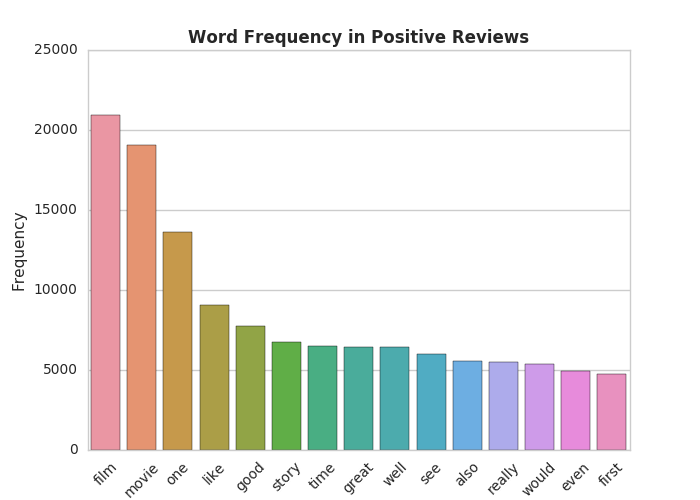

In [18]:
fig, ax = plt.subplots(figsize=(7,5))
sns.set(style="whitegrid")
ax = sns.barplot(x="word", y="frequency", data=freq_positive)
plt.xticks(rotation=45)
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
plt.title('Word Frequency in Positive Reviews', fontweight='bold')
display(fig)

In [19]:
#most common words in negative reviews

fdist3 = Counter(" ".join(negative_reviews['review']).split())

fdist3.most_common(15)

Out[ 19 ]: 
[('movie', 24956),
 ('film', 19213),
 ('one', 13135),
 ('like', 11238),
 ('even', 7684),
 ('good', 7419),
 ('bad', 7394),
 ('would', 7036),
 ('really', 6262),
 ('time', 6209),
 ('see', 5450),
 ('story', 5204),
 ('much', 5077),
 ('get', 5038),
 ('people', 4806)]

In [20]:
freq_negative = pd.DataFrame(fdist3.most_common(15),
                  columns=['word', 'frequency'])
print(freq_negative)

word frequency
0 movie 24956
1 film 19213
2 one 13135
3 like 11238
4 even 7684
5 good 7419
6 bad 7394
7 would 7036
8 really 6262
9 time 6209
10 see 5450
11 story 5204
12 much 5077
13 get 5038
14 people 4806

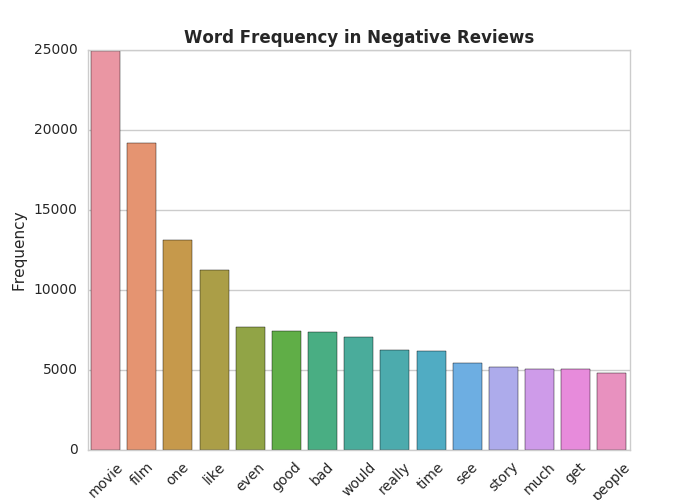

In [21]:
fig, ax = plt.subplots(figsize=(7,5))
sns.set(style="whitegrid")
ax = sns.barplot(x="word", y="frequency", data=freq_negative)
plt.xticks(rotation=45)
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
plt.title('Word Frequency in Negative Reviews', fontweight='bold')
display(fig)

In [22]:
# most common bigrams in all reviews using FreqDist

tokens = " ".join(clean_reviews_df['review']).split()
bgs = nltk.bigrams(tokens)
fdist4 = FreqDist(bgs)
print(fdist4)
fdist4.most_common(15)

<FreqDist with 1784247 samples and 2988088 outcomes>
 Out[ 26 ]: 
[(('ever', 'seen'), 1320),
 (('special', 'effects'), 1114),
 (('even', 'though'), 1043),
 (('one', 'best'), 919),
 (('low', 'budget'), 880),
 (('year', 'old'), 878),
 (('looks', 'like'), 838),
 (('waste', 'time'), 789),
 (('see', 'movie'), 781),
 (('much', 'better'), 746),
 (('new', 'york'), 743),
 (('first', 'time'), 731),
 (('good', 'movie'), 724),
 (('watch', 'movie'), 666),
 (('sci', 'fi'), 652)]

In [23]:
bigram_all = pd.DataFrame(fdist4.most_common(15),
                  columns=['bigram', 'frequency'])
print(bigram_all)

bigram frequency
0 (ever, seen) 1320
1 (special, effects) 1114
2 (even, though) 1043
3 (one, best) 919
4 (low, budget) 880
5 (year, old) 878
6 (looks, like) 838
7 (waste, time) 789
8 (see, movie) 781
9 (much, better) 746
10 (new, york) 743
11 (first, time) 731
12 (good, movie) 724
13 (watch, movie) 666
14 (sci, fi) 652

In [24]:
#tup = bigram_all['bigram tuple'].iloc[0]
#' '.join(tup)

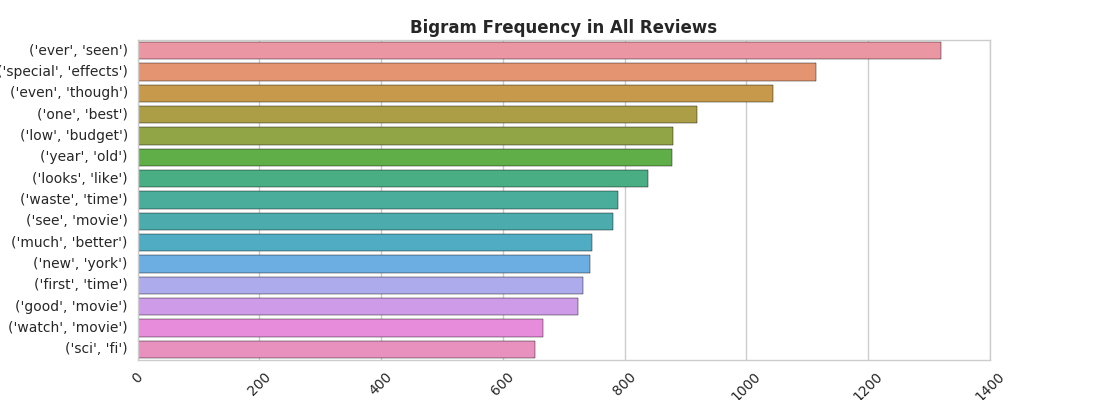

In [25]:
fig, ax = plt.subplots(figsize=(11,4))
sns.set(style="whitegrid")
ax = sns.barplot(x="frequency", y="bigram", data=bigram_all)
plt.xticks(rotation=45)
ax.set_xlabel('Bigram')
ax.set_ylabel('Frequency')
plt.title('Bigram Frequency in All Reviews', fontweight='bold')
display(fig)

In [26]:
# most common bigrams in positive reviews using FreqDist

tokens = " ".join(positive_reviews['review']).split()
bgs = nltk.bigrams(tokens)
fdist5 = FreqDist(bgs)
print(fdist1)
fdist5.most_common(15)

<FreqDist with 74065 samples and 2988089 outcomes>
 Out[ 30 ]: 
[(('one', 'best'), 799),
 (('even', 'though'), 577),
 (('first', 'time'), 500),
 (('ever', 'seen'), 491),
 (('new', 'york'), 484),
 (('special', 'effects'), 427),
 (('see', 'movie'), 391),
 (('real', 'life'), 383),
 (('years', 'ago'), 380),
 (('must', 'see'), 377),
 (('good', 'movie'), 372),
 (('year', 'old'), 371),
 (('well', 'done'), 369),
 (('great', 'movie'), 338),
 (('sci', 'fi'), 336)]

In [27]:
bigram_positive = pd.DataFrame(fdist5.most_common(15),
                  columns=['bigram', 'frequency'])
print(bigram_positive)

bigram frequency
0 (one, best) 799
1 (even, though) 577
2 (first, time) 500
3 (ever, seen) 491
4 (new, york) 484
5 (special, effects) 427
6 (see, movie) 391
7 (real, life) 383
8 (years, ago) 380
9 (must, see) 377
10 (good, movie) 372
11 (year, old) 371
12 (well, done) 369
13 (great, movie) 338
14 (sci, fi) 336

In [28]:
# most common bigrams in negative reviews using FreqDist

tokens = " ".join(negative_reviews['review']).split()
bgs = nltk.bigrams(tokens)
fdist6 = FreqDist(bgs)
print(fdist1)
fdist6.most_common(15)

<FreqDist with 74065 samples and 2988089 outcomes>
 Out[ 32 ]: 
[(('ever', 'seen'), 830),
 (('waste', 'time'), 750),
 (('special', 'effects'), 687),
 (('looks', 'like'), 627),
 (('low', 'budget'), 594),
 (('year', 'old'), 507),
 (('much', 'better'), 501),
 (('one', 'worst'), 486),
 (('movie', 'ever'), 466),
 (('even', 'though'), 466),
 (('bad', 'movie'), 447),
 (('look', 'like'), 435),
 (('see', 'movie'), 387),
 (('watch', 'movie'), 374),
 (('pretty', 'much'), 370)]

In [29]:
bigram_negative = pd.DataFrame(fdist6.most_common(15),
                  columns=['bigram', 'frequency'])
print(bigram_negative)

bigram frequency
0 (ever, seen) 830
1 (waste, time) 750
2 (special, effects) 687
3 (looks, like) 627
4 (low, budget) 594
5 (year, old) 507
6 (much, better) 501
7 (one, worst) 486
8 (movie, ever) 466
9 (even, though) 466
10 (bad, movie) 447
11 (look, like) 435
12 (see, movie) 387
13 (watch, movie) 374
14 (pretty, much) 370

In [30]:
%sh
/databricks/python/bin/pip install wordcloud

Collecting wordcloud
 Downloading https://files.pythonhosted.org/packages/5e/b7/c16286efa3d442d6983b3842f982502c00306c1a4c719c41fb00d6017c77/wordcloud-1.5.0-cp35-cp35m-manylinux1_x86_64.whl (357kB)
Requirement already satisfied: numpy>=1.6.1 in /databricks/python3/lib/python3.5/site-packages (from wordcloud) (1.11.1)
Requirement already satisfied: pillow in /databricks/python3/lib/python3.5/site-packages (from wordcloud) (3.3.1)
Installing collected packages: wordcloud
Successfully installed wordcloud-1.5.0
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [31]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import matplotlib.cm

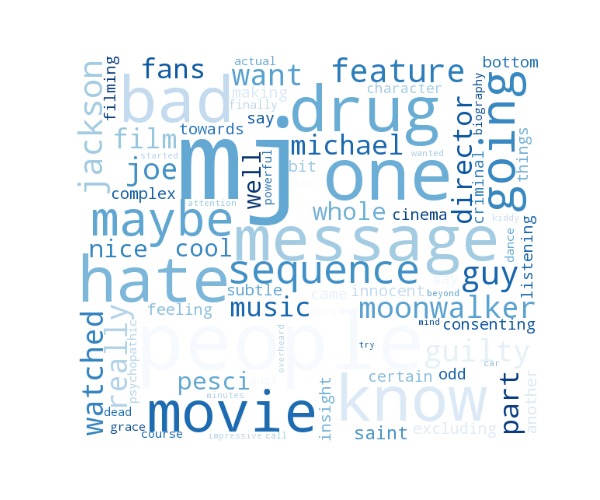

In [32]:
# Start with one review:
text = clean_reviews[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=80, width=600, height=500,
                      background_color="white", colormap=matplotlib.cm.Blues).generate(text)

# Display the generated image:
plt.figure( figsize=(6,5) )
#plt.title('Word Frequency in One Review', fontweight='bold')
plt.imshow(wordcloud, interpolation='bilinear', vmin=50, vmax=60)
plt.axis("off")
display(plt.show())

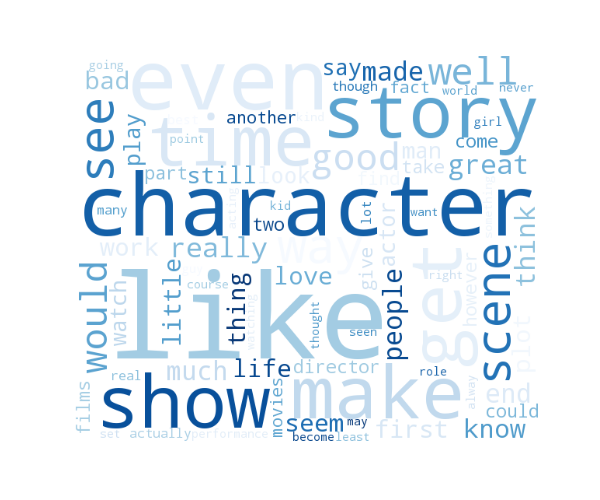

In [33]:
# Now all reviews:
text = " ".join(clean_reviews_df['review'])

stopwords = ['movie', 'one', 'film', 'also']

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, max_words=80, width=600, height=500,
                      background_color="white", colormap=matplotlib.cm.Blues).generate(text)

# Display the generated image:
plt.figure( figsize=(6,5) )
plt.imshow(wordcloud, interpolation='bilinear', vmin=50, vmax=60)
plt.axis("off")
display(plt.show())

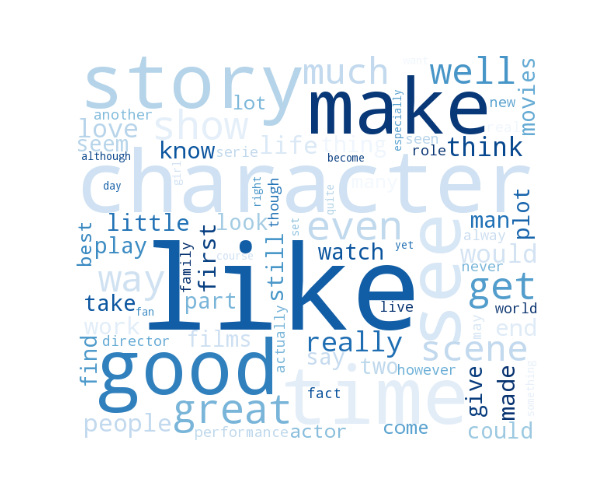

In [34]:
# Now positive reviews:
text = " ".join(positive_reviews['review'])

stopwords = ['movie', 'one', 'film', 'also']

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, max_words=80, width=600, height=500,
                      background_color="white", colormap=matplotlib.cm.Blues).generate(text)

# Display the generated image:
plt.figure( figsize=(6,5) )
plt.imshow(wordcloud, interpolation='bilinear', vmin=50, vmax=60)
plt.axis("off")
display(plt.show())

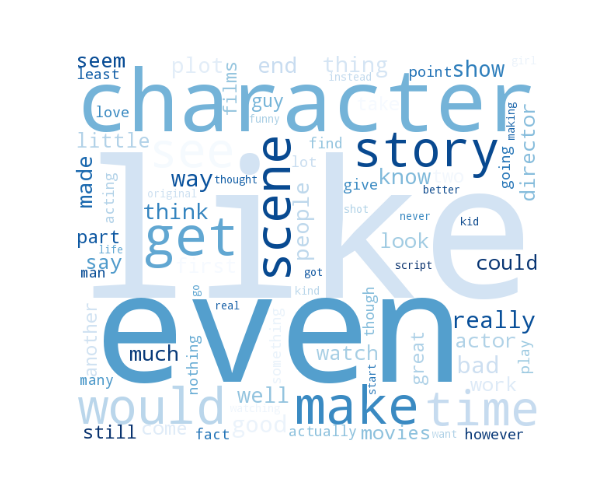

In [35]:
# Now negative reviews:
text = " ".join(negative_reviews['review'])

stopwords = ['movie', 'one', 'film', 'also']

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, max_words=80, width=600, height=500,
                      background_color="white", colormap=matplotlib.cm.Blues).generate(text)

# Display the generated image:
plt.figure( figsize=(6,5) )
plt.imshow(wordcloud, interpolation='bilinear', vmin=50, vmax=60)
plt.axis("off")
display(plt.show())

In [36]:
bigram_dict = bigram_all.set_index('bigram').T.to_dict('list') 
#df.set_index('ID').T.to_dict('list')

bigram_dict_new = {}
for k, v in bigram_dict.items():
  bigram_dict_new[' '.join(k)] = v[0]
  #print(k)
  #print(v)
  
bigram_dict_new

--------------------------------------------------------------------------- 
 KeyError Traceback (most recent call last)
 <command-3876914811656140> in <module> () 
 ----> 1 bigram_dict = bigram_all . set_index ( 'bigram tuple' ) . T . to_dict ( 'list' ) 
 2 #df.set_index('ID').T.to_dict('list') 
 3 
 4 bigram_dict_new = { } 
 5 for k , v in bigram_dict . items ( ) : 

 /databricks/python/lib/python3.5/site-packages/pandas/core/frame.py in set_index (self, keys, drop, append, inplace, verify_integrity) 
 2915 names . append ( None ) 
 2916 else : 
 -> 2917 level = frame [ col ] . _values 
 2918 names . append ( col ) 
 2919 if drop : 

 /databricks/python/lib/python3.5/site-packages/pandas/core/frame.py in __getitem__ (self, key) 
 2057 return self . _getitem_multilevel ( key ) 
 2058 else : 
 -> 2059 return self . _getitem_column ( key ) 
 2060 
 2061 def _getitem_column ( self , key ) : 

 /databricks/python/lib/python3.5/site-packages/pandas/core/frame.py in _getitem_column (self, key) 
 2064 # get column 
 2065 if self . columns . is_unique : 
 -> 2066 return self . _get_item_cache ( key ) 
 2067 
 2068 # duplicate columns & possible reduce dimensionality 

 /databricks/python/lib/python3.5/site-packages/pandas/core/generic.py in _get_item_cache (self, item) 
 1384 res = cache . get ( item ) 
 1385 if res is None : 
 -> 1386 values = self . _data . get ( item ) 
 1387 res = self . _box_item_values ( item , values ) 
 1388 cache [ item ] = res 

 /databricks/python/lib/python3.5/site-packages/pandas/core/internals.py in get (self, item, fastpath) 
 3541 
 3542 if not isnull ( item ) : 
 -> 3543 loc = self . items . get_loc ( item ) 
 3544 else : 
 3545 indexer = np . arange ( len ( self . items ) ) [ isnull ( self . items ) ] 

 /databricks/python/lib/python3.5/site-packages/pandas/indexes/base.py in get_loc (self, key, method, tolerance) 
 2134 return self . _engine . get_loc ( key ) 
 2135 except KeyError : 
 -> 2136 return self . _engine . get_loc ( self . _maybe_cast_indexer ( key ) ) 
 2137 
 2138 indexer = self . get_indexer ( [ key ] , method = method , tolerance = tolerance ) 

 /databricks/python/lib/python3.5/site-packages/pandas/index.cpython-35m-x86_64-linux-gnu.so in pandas.index.IndexEngine.get_loc (pandas/index.c:4145) () 

 /databricks/python/lib/python3.5/site-packages/pandas/index.cpython-35m-x86_64-linux-gnu.so in pandas.index.IndexEngine.get_loc (pandas/index.c:4009) () 

 /databricks/python/lib/python3.5/site-packages/pandas/hashtable.cpython-35m-x86_64-linux-gnu.so in pandas.hashtable.PyObjectHashTable.get_item (pandas/hashtable.c:13166) () 

 /databricks/python/lib/python3.5/site-packages/pandas/hashtable.cpython-35m-x86_64-linux-gnu.so in pandas.hashtable.PyObjectHashTable.get_item (pandas/hashtable.c:13120) () 

 KeyError : 'bigram tuple'

In [37]:
bigram_dict_new

# Create and generate a word cloud image:
wordcloud = WordCloud(width=600, height=500,
                      background_color="white", colormap=matplotlib.cm.Blues)
wordcloud.generate_from_frequencies(bigram_dict_new)

# Display the generated image:
plt.figure( figsize=(6,5) )
plt.imshow(wordcloud, interpolation='bilinear', vmin=50, vmax=60)
plt.axis("off")
display(plt.show())

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-3876914811656136> in <module> () 
 ----> 1 bigram_dict_new 
 2 
 3 # Create and generate a word cloud image: 
 4 wordcloud = WordCloud(width=600, height=500,
 5 background_color="white", colormap=matplotlib.cm.Blues)

 NameError : name 'bigram_dict_new' is not defined

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 

cv=CountVectorizer(max_df=0.85)
word_count_vector=cv.fit_transform(clean_reviews)

In [39]:
list(cv.vocabulary_.keys())[:10]

Out[ 43 ]: 
['wakes',
 'bogroll',
 'sparkly',
 'cinematographic',
 'exwife',
 'speculations',
 'gojoe',
 'alphas',
 'skinkons',
 'narcissism']

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

Out[ 44 ]: TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [41]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [42]:
# you only needs to do this once, this is a mapping of index to 
feature_names=cv.get_feature_names()
 
# get the document that we want to extract keywords from
doc=clean_reviews[0]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
 
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
 
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)

keywords_sorted = sorted(keywords, key=keywords.get, reverse=True)
 
# now print the results
print("\n=====Doc=====")
print(doc)
print("\n===Keywords===")
for k in keywords_sorted:
    print(k, keywords[k])

=====Doc=====
stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working one kid let alone whole bunch performing complex dance scene bottom line movie people like mj one level another think people stay away try give wholesome message ironically mj bestest buddy movie girl michael jackson truly one talented people ever grace planet guilty well attention gave subject hmmm well know people different behind closed doors know fact either extremely nice stupid guy one sickest liars hope latter

===Keywords===
mj 0.77
moonwalker 0.133
pesci 0.13
sequence 0.11
people 0.096
jackson 0.095
guilty 0.095
drugs 0.09
maybe 0.085
joe 0.082

In [43]:
%sh
/databricks/python/bin/pip install spacy && python -m spacy download en

Requirement already satisfied: spacy in /databricks/python3/lib/python3.5/site-packages (2.1.3)
Requirement already satisfied: numpy>=1.15.0 in /databricks/python3/lib/python3.5/site-packages (from spacy) (1.16.2)
Requirement already satisfied: wasabi<1.1.0,>=0.2.0 in /databricks/python3/lib/python3.5/site-packages (from spacy) (0.2.1)
Requirement already satisfied: cymem<2.1.0,>=2.0.2 in /databricks/python3/lib/python3.5/site-packages (from spacy) (2.0.2)
Requirement already satisfied: srsly<1.1.0,>=0.0.5 in /databricks/python3/lib/python3.5/site-packages (from spacy) (0.0.5)
Requirement already satisfied: blis<0.3.0,>=0.2.2 in /databricks/python3/lib/python3.5/site-packages (from spacy) (0.2.4)
Requirement already satisfied: thinc<7.1.0,>=7.0.2 in /databricks/python3/lib/python3.5/site-packages (from spacy) (7.0.4)
Requirement already satisfied: jsonschema<3.0.0,>=2.6.0 in /databricks/python3/lib/python3.5/site-packages (from spacy) (2.6.0)
Requirement already satisfied: requests<3.0.0,>=2.13.0 in /databricks/python3/lib/python3.5/site-packages (from spacy) (2.21.0)
Requirement already satisfied: preshed<2.1.0,>=2.0.1 in /databricks/python3/lib/python3.5/site-packages (from spacy) (2.0.1)
Requirement already satisfied: plac<1.0.0,>=0.9.6 in /databricks/python3/lib/python3.5/site-packages (from spacy) (0.9.6)
Requirement already satisfied: murmurhash<1.1.0,>=0.28.0 in /databricks/python3/lib/python3.5/site-packages (from spacy) (1.0.2)
Requirement already satisfied: tqdm<5.0.0,>=4.10.0 in /databricks/python3/lib/python3.5/site-packages (from thinc<7.1.0,>=7.0.2->spacy) (4.31.1)
Requirement already satisfied: idna<2.9,>=2.5 in /databricks/python3/lib/python3.5/site-packages (from requests<3.0.0,>=2.13.0->spacy) (2.8)
Requirement already satisfied: chardet<3.1.0,>=3.0.2 in /databricks/python3/lib/python3.5/site-packages (from requests<3.0.0,>=2.13.0->spacy) (3.0.4)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.5/site-packages (from requests<3.0.0,>=2.13.0->spacy) (2019.3.9)
Requirement already satisfied: urllib3<1.25,>=1.21.1 in /databricks/python3/lib/python3.5/site-packages (from requests<3.0.0,>=2.13.0->spacy) (1.24.1)
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
python: can't open file 'spacy': [Errno 2] No such file or directory

In [44]:
%sh
/databricks/python/bin/pip install scattertext

Collecting scattertext
 Downloading https://files.pythonhosted.org/packages/07/4e/e015cf5ad5fef0cf181a49d319bbc774d00629c097e0c3a08f4e93f75bc2/scattertext-0.0.2.43-py3-none-any.whl (9.2MB)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.5/site-packages (from scattertext) (1.16.2)
Requirement already satisfied: six in /usr/lib/python3/dist-packages (from scattertext) (1.10.0)
Requirement already satisfied: scikit-learn in /databricks/python3/lib/python3.5/site-packages (from scattertext) (0.18.1)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.5/site-packages (from scattertext) (0.18.1)
Requirement already satisfied: pandas in /databricks/python3/lib/python3.5/site-packages (from scattertext) (0.19.2)
Collecting mock (from scattertext)
 Downloading https://files.pythonhosted.org/packages/e6/35/f187bdf23be87092bd0f1200d43d23076cee4d0dec109f195173fd3ebc79/mock-2.0.0-py2.py3-none-any.whl (56kB)
Requirement already satisfied: python-dateutil>=2 in /databricks/python3/lib/python3.5/site-packages (from pandas->scattertext) (2.5.3)
Requirement already satisfied: pytz>=2011k in /databricks/python3/lib/python3.5/site-packages (from pandas->scattertext) (2016.6.1)
Collecting pbr>=0.11 (from mock->scattertext)
 Downloading https://files.pythonhosted.org/packages/14/09/12fe9a14237a6b7e0ba3a8d6fcf254bf4b10ec56a0185f73d651145e9222/pbr-5.1.3-py2.py3-none-any.whl (107kB)
Installing collected packages: pbr, mock, scattertext
Successfully installed mock-2.0.0 pbr-5.1.3 scattertext-0.0.2.43
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [45]:
import spacy
import scattertext as st
from IPython.display import IFrame

nlp = st.WhitespaceNLP.whitespace_nlp

clean_reviews_df['category'] = clean_reviews_df['sentiment'].astype(str)

#Create a Scattertext corpus:

corpus = st.CorpusFromPandas(clean_reviews_df, 
                              category_col='sentiment', 
                              text_col='review',
                              nlp=nlp).build()

#Create an HTML vis, then save and open:
#html = st.produce_scattertext_explorer(corpus, category='1')
#open("Coffee-Visualization.html", 'wb').write(html.encode('utf-8'))
       
html = st.produce_scattertext_explorer(corpus,
                                    category='category',
                                    category_name='Positive',
                                    not_category_name='Negative',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.scale,
                                    metadata=clean_reviews_df['id'])

file_name = 'output/testScattertext.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)



--------------------------------------------------------------------------- 
 AssertionError Traceback (most recent call last)
 <command-3155694642411473> in <module> () 
 25 minimum_term_frequency = 5 , 
 26 transform = st . Scalers . scale , 
 ---> 27 metadata=clean_reviews_df['id'])
 28 
 29 file_name = 'output/testScattertext.html' 

 /databricks/python/lib/python3.5/site-packages/scattertext/__init__.py in produce_scattertext_explorer (corpus, category, category_name, not_category_name, protocol, pmi_threshold_coefficient, minimum_term_frequency, minimum_not_category_term_frequency, max_terms, filter_unigrams, height_in_pixels, width_in_pixels, max_snippets, max_docs_per_category, metadata, scores, x_coords, y_coords, original_x, original_y, rescale_x, rescale_y, singleScoreMode, sort_by_dist, reverse_sort_scores_for_not_category, use_full_doc, transform, jitter, gray_zero_scores, term_ranker, asian_mode, use_non_text_features, show_top_terms, show_characteristic, word_vec_use_p_vals, max_p_val, p_value_colors, term_significance, save_svg_button, x_label, y_label, d3_url, d3_scale_chromatic_url, pmi_filter_thresold, alternative_text_field, terms_to_include, semiotic_square, num_terms_semiotic_square, not_categories, neutral_categories, extra_categories, show_neutral, neutral_category_name, get_tooltip_content, x_axis_values, y_axis_values, color_func, term_scorer, show_axes, horizontal_line_y_position, vertical_line_x_position, show_cross_axes, show_extra, extra_category_name, censor_points, center_label_over_points, x_axis_labels, y_axis_labels, topic_model_term_lists, topic_model_preview_size, metadata_descriptions, vertical_lines, characteristic_scorer, term_colors, unified_context, show_category_headings, include_term_category_counts, div_name, alternative_term_func, return_data) 
 446 extra_categories = extra_categories , 
 447 background_scorer = characteristic_scorer , 
 --> 448 include_term_category_counts=include_term_category_counts)
 449 if return_data : 
 450 return scatter_chart_data 

 /databricks/python/lib/python3.5/site-packages/scattertext/ScatterChartExplorer.py in to_dict (self, category, category_name, not_category_name, scores, metadata, max_docs_per_category, transform, alternative_text_field, title_case_names, not_categories, neutral_categories, extra_categories, neutral_category_name, extra_category_name, background_scorer, include_term_category_counts) 
 108 neutral_categories = neutral_categories , 
 109 extra_categories = extra_categories , 
 --> 110 background_scorer=background_scorer)
 111 docs_getter = self . _make_docs_getter ( max_docs_per_category , alternative_text_field ) 
 112 if neutral_category_name is None : 

 /databricks/python/lib/python3.5/site-packages/scattertext/ScatterChart.py in to_dict (self, category, category_name, not_category_name, scores, transform, title_case_names, not_categories, neutral_categories, extra_categories, background_scorer) 
 266 
 267 all_categories = self . term_doc_matrix . get_categories ( ) 
 --> 268 assert category in all_categories 
 269 
 270 if not_categories is None : 

 AssertionError :

In [46]:
import spacy
nlp = spacy.load('en')

--------------------------------------------------------------------------- 
 OSError Traceback (most recent call last)
 <command-2086289002234956> in <module> () 
 1 import spacy 
 ----> 2 nlp = spacy . load ( 'en' ) 

 /databricks/python/lib/python3.5/site-packages/spacy/__init__.py in load (name, **overrides) 
 25 if depr_path not in ( True , False , None ) : 
 26 deprecation_warning ( Warnings . W001 . format ( path = depr_path ) ) 
 ---> 27 return util . load_model ( name , ** overrides ) 
 28 
 29 

 /databricks/python/lib/python3.5/site-packages/spacy/util.py in load_model (name, **overrides) 
 134 elif hasattr ( name , "exists" ) : # Path or Path-like to model data 
 135 return load_model_from_path ( name , ** overrides ) 
 --> 136 raise IOError ( Errors . E050 . format ( name = name ) ) 
 137 
 138 

 OSError : [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [47]:
clean_reviews_df['review'].iloc[0].split()

Out[ 59 ]: 
['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary',
 'watched',
 'wiz',
 'watched',
 'moonwalker',
 'maybe',
 'want',
 'get',
 'certain',
 'insight',
 'guy',
 'thought',
 'really',
 'cool',
 'eighties',
 'maybe',
 'make',
 'mind',
 'whether',
 'guilty',
 'innocent',
 'moonwalker',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'remember',
 'going',
 'see',
 'cinema',
 'originally',
 'released',
 'subtle',
 'messages',
 'mj',
 'feeling',
 'towards',
 'press',
 'also',
 'obvious',
 'message',
 'drugs',
 'bad',
 'kay',
 'visually',
 'impressive',
 'course',
 'michael',
 'jackson',
 'unless',
 'remotely',
 'like',
 'mj',
 'anyway',
 'going',
 'hate',
 'find',
 'boring',
 'may',
 'call',
 'mj',
 'egotist',
 'consenting',
 'making',
 'movie',
 'mj',
 'fans',
 'would',
 'say',
 'made',
 'fans',
 'true',
 'really',
 'nice',
 'actual',
 'feature',
 'film',
 'bit',
 'finally',
 'starts',
 'minutes',
 'excluding',
 'smooth',
 'criminal',
 'sequence',
 'joe',
 'pesci',
 'convincing',
 'psychopathic',
 'powerful',
 'drug',
 'lord',
 'wants',
 'mj',
 'dead',
 'bad',
 'beyond',
 'mj',
 'overheard',
 'plans',
 'nah',
 'joe',
 'pesci',
 'character',
 'ranted',
 'wanted',
 'people',
 'know',
 'supplying',
 'drugs',
 'etc',
 'dunno',
 'maybe',
 'hates',
 'mj',
 'music',
 'lots',
 'cool',
 'things',
 'like',
 'mj',
 'turning',
 'car',
 'robot',
 'whole',
 'speed',
 'demon',
 'sequence',
 'also',
 'director',
 'must',
 'patience',
 'saint',
 'came',
 'filming',
 'kiddy',
 'bad',
 'sequence',
 'usually',
 'directors',
 'hate',
 'working',
 'one',
 'kid',
 'let',
 'alone',
 'whole',
 'bunch',
 'performing',
 'complex',
 'dance',
 'scene',
 'bottom',
 'line',
 'movie',
 'people',
 'like',
 'mj',
 'one',
 'level',
 'another',
 'think',
 'people',
 'stay',
 'away',
 'try',
 'give',
 'wholesome',
 'message',
 'ironically',
 'mj',
 'bestest',
 'buddy',
 'movie',
 'girl',
 'michael',
 'jackson',
 'truly',
 'one',
 'talented',
 'people',
 'ever',
 'grace',
 'planet',
 'guilty',
 'well',
 'attention',
 'gave',
 'subject',
 'hmmm',
 'well',
 'know',
 'people',
 'different',
 'behind',
 'closed',
 'doors',
 'know',
 'fact',
 'either',
 'extremely',
 'nice',
 'stupid',
 'guy',
 'one',
 'sickest',
 'liars',
 'hope',
 'latter']

In [48]:
clean_reviews_df['parsed'] = clean_reviews_df['review'].apply(nltk.word_tokenize)

In [49]:
clean_reviews_df.head()

Out[ 64 ]: 
 id sentiment review \
0 5814_8 1 stuff going moment mj started listening music ... 
1 2381_9 1 classic war worlds timothy hines entertaining ... 
2 7759_3 0 film starts manager nicholas bell giving welco... 
3 3630_4 0 must assumed praised film greatest filmed oper... 
4 9495_8 1 superbly trashy wondrously unpretentious explo... 

 category parsed 
0 1 [stuff, going, moment, mj, started, listening,... 
1 1 [classic, war, worlds, timothy, hines, enterta... 
2 0 [film, starts, manager, nicholas, bell, giving... 
3 0 [must, assumed, praised, film, greatest, filme... 
4 1 [superbly, trashy, wondrously, unpretentious, ...

In [50]:
import spacy
import scattertext as st
from IPython.display import IFrame

nlp = st.WhitespaceNLP.whitespace_nlp

clean_reviews_df['category'] = clean_reviews_df['sentiment'].astype(str)

#Create a Scattertext corpus:

corpus = st.CorpusFromPandas(clean_reviews_df, 
                              category_col='category', 
                              text_col='review',
                              nlp=nlp).build()

#Create an HTML vis, then save and open:
#html = st.produce_scattertext_explorer(corpus, category='1')
#open("Coffee-Visualization.html", 'wb').write(html.encode('utf-8'))
       
html = st.produce_scattertext_explorer(corpus,
                                    category='1',
                                    category_name='Positive',
                                    not_category_name='Negative',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.scale,
                                    metadata=clean_reviews_df['id'])

#file_name = 'output/testScattertext.html'
#open(file_name, 'wb').write(html.encode('utf-8'))
#IFrame(src=file_name, width = 1200, height=700)

open("Coffee-Visualization.html", 'wb').write(html.encode('utf-8'))
IFrame(src="Coffee-Visualization.html", width = 1200, height=700)

Out[ 68 ]: <IPython.lib.display.IFrame at 0x7f0a98fbc160>